# HLAthena
### Python package for HLA class I peptide analysis, binding prediction, and model training

## Installation

To install hlathena run: 

    git clone https://github.com/ssarkizova/hlathenav2
    cd hlathenav2
            pip install .

## Usage

#### Importing the package

In [1]:
import hlathena as ht

Next, we'll import some example data

In [2]:
import pandas as pd
sample_pep_file = "A0101_filtered.txt"
df = pd.read_table(sample_pep_file)
peptides = list(df['seq'])

### Peptide analysis

First, we'll plot the length distribution of the peptide set.

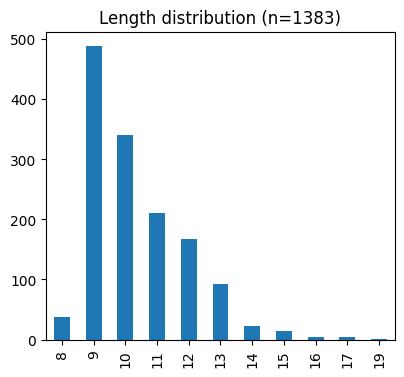

In [3]:
ht.plot_length(peptides)

Next, we'll visualize the amino acid motifs of this peptide set

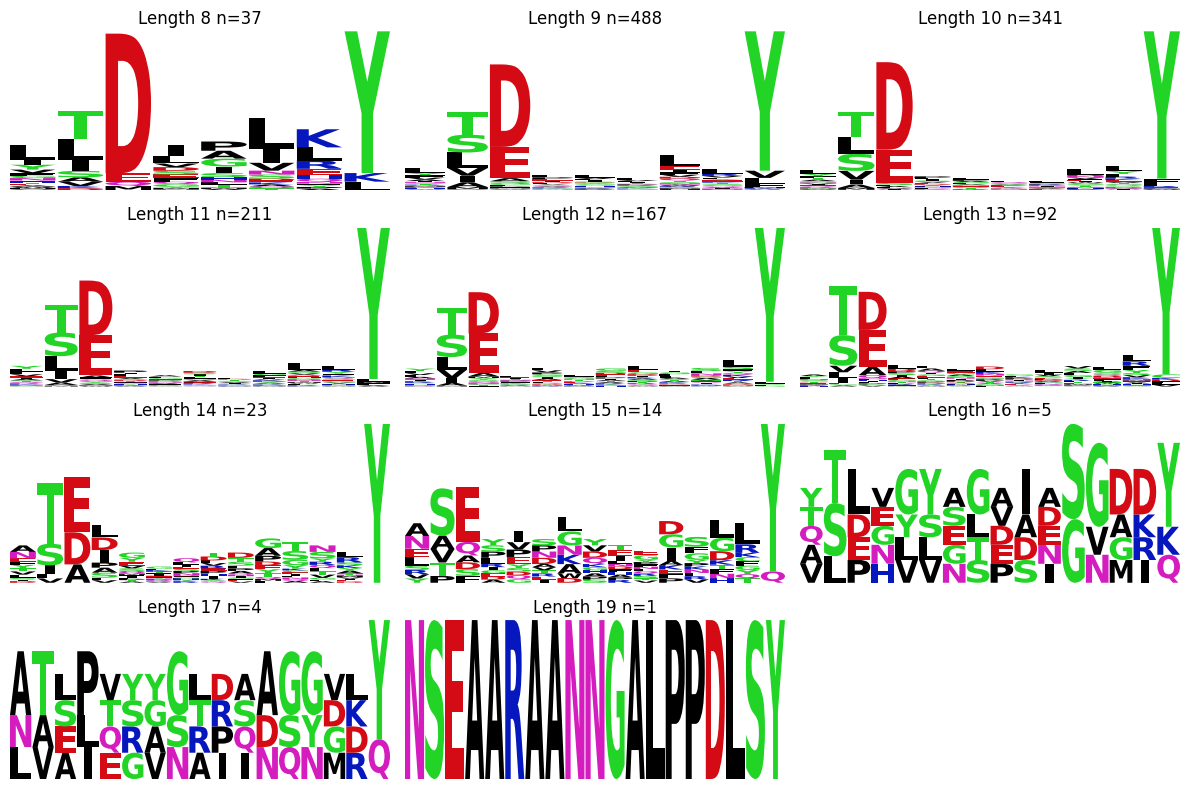

In [4]:
ht.plot_logo(peptides)

Let's examine the 9mer's motif more closely

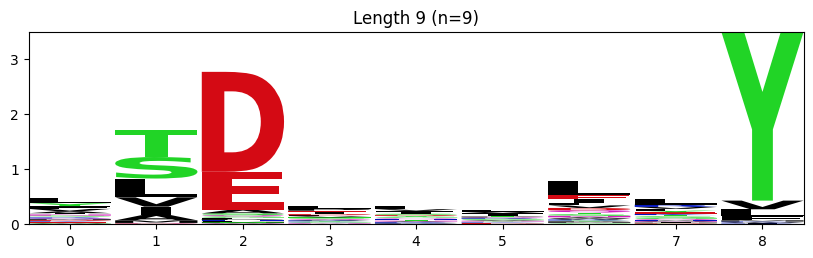

In [5]:
ht.plot_logo(peptides, 9)

Next, we want to cluster these peptides with a UMAP. First, we'll neeed to do some dimensionality reduction using the peptide projection module.

We will specify that we want to use Kidera Factors for the amino acid encoding by providing a file path. Additional files with amino acid encodings can be included (they must be tab-delimited txt files with one row per amino acid symbol and 1+ columns). 

We will also save this encoding in case we want to re-use it later.

In [3]:
feature_matrix = ht.PCA_encode(peptides, 'A0101', 9, aa_featurefiles=['kideraFactors.txt'], save_PCA_path='pca_encoding.npz')

Now we can make a simple UMAP plot:

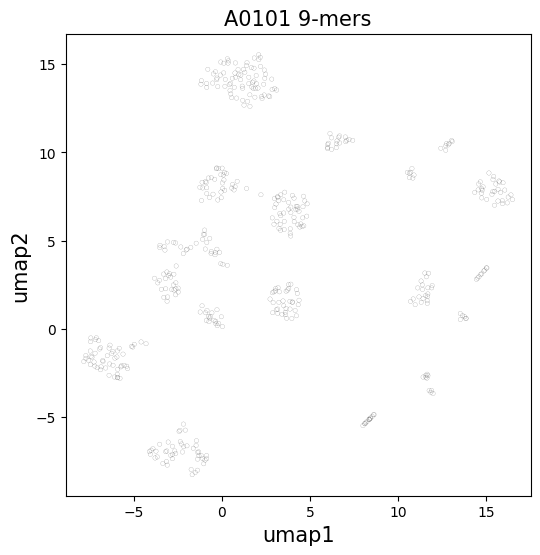

In [5]:
ht.plot_umap(feature_matrix, title='A0101 9-mers')

### Peptide binding prediction

In [11]:
model_path = '../models/NN-time2022-12-16_10:32:38.859301-fold0.pt'

ninemers = [pep for pep in peptides if len(pep)==9] # create list of ninemers 
ht.predict(model_path, ninemers)

,seq,score
0,AADIFYSRY,3.535182713676477e-06
1,AADLNLVLY,9.253981261281297e-06
2,AADLVEALY,9.627723329685978e-07
3,AIDEDVLRY,1.6805062841740437e-05
4,AIDLLKEIY,1.499109316682734e-06
...,...,...
483,YTSDYFISY,0.0007096683839336038
484,YVDDVFLRV,0.953221321105957
485,YVDPQFLTY,9.512112592346966e-05
486,YVEKFALNY,1.3267753274703864e-05
